# DAB200 -- Lab 5

In this lab, you will gain further experience in dealing with missing data and further practice converting non-numeric features in a dataset to numeric, as well as, exploring ways to increase model performance through data set improvement.

**Target**: `Comb Unadj FE - Conventional Fuel`

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-3 | vehicles_2014.csv |
| 4-6 | vehicles_2015.csv |
| 7-9 | vehicles_2016.csv |
| 10-12 | vehicles_2017.csv |
| 13-15 | vehicles_2018.csv |
| 16-18 | vehicles_2019.csv |

**Important Notes:**
- **Only provide FINAL code in each Part of the lab**
    - I only want to see final, well-organized code in your submission
- Only need to use **random forest** models
    - All random forest models should include 150 decision trees
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
     - **If you use `train_test_split()` or calculate MSE or MAE you will have marks deducted!**
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Don't make assumptions!
- Information about the data can be found at [this website](https://www.fueleconomy.gov/feg/download.shtml)



**A few tips**
 - The function `sniff_modified` (from lecture notebooks) will probably come in handy
 - If you use `dropna`, it may be worthwhile exloring the `thresh` parameter
 - If you use `.info()`, you might need to set the `verbose` parameter
 - List comprehensions (or other programmatic methods) might be helpful in trying to select columns: `[f for f in df.columns if 'some_text' in f]`
 - And you don't have to get all the columns of interest in one go because `['a', 'b'] + ['c', 'd'] = ['a', 'b', 'c', 'd']`
 - If a feature has only 1 unique element how long would the list `df[col].unique()` be?
 - To help in viewing the data, you may find these commands helpful (see [here](https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/) for explanation):
    - `pd.set_option('display.max_rows', None)`
    - `pd.set_option('display.max_columns', None)`
    - `pd.set_option('display.width', None)`
    - `pd.set_option('display.max_colwidth', None)`
 - start simple; then build up complexity, but only if needed

### Part 0

Please provide the following information:
 - Group 12 
 - Nikhil Joshi
 - Gurpreet Kaur
 - Gurjit Kaur     

### Part 1: Initial data clean-up

In this part, you will follow the steps below to do an initial clean-up of the data.

##### Step 1: Remove target related features

The data contains some features that are essentially equivalent to the target. If we leave them in, they will leak information about the target to the model and the model performance will be erroneously high. Columns with a date are also not helpful here. In this step, we will remove any feature that contains:
 - 'rating'
 - 'ghg'
 - 'mpg'
 - 'co2'
 - 'alternative fuel'
 - 'conventional fuel' (except for the actual target!)
 - 'fuel costs'
 - 'date'

There may be other columns that are strongly correlated with the target that **need to be removed**; so, if you are getting a very high oob score (approx. = 1) then you should check for other features that may also be equivalent to the target and remove them also. 

In [85]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from rfpimp import * 
import category_encoders as ce
from sklearn import preprocessing
import category_encoders as ce

df = pd.read_csv("vehicles_2017.csv")
df.info(verbose=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Columns: 162 entries, Model Year to Comb PHEV Composite MPGe
dtypes: float64(77), int64(18), object(67)
memory usage: 1.5+ MB


In [86]:
# This step will help to remove 'conventional fuel' (except for the actual target!)
newdf=df.drop('Comb Unadj FE - Conventional Fuel',axis=1)
newdf.head(2)

,Model Year,Mfr Name,Division,Carline,Verify Mfr Cd,Index (Model Type Index),Eng Displ,# Cyl,Transmission,City FE (Guide) - Conventional Fuel,...,City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label),CO2-PHEV Composite Rounded Adjusted Combined CO2,240V Charge Time at 240 volts (hours),120V Charge time at 120 Volts (hours),PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,City PHEV Composite MPGe,Hwy PHEV Composite MPGe,Comb PHEV Composite MPGe
0,2017,Honda,Acura,NSX,HNX,3,3.5,6,Auto(AM-S9),21,...,419,406,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,FCA US LLC,ALFA ROMEO,4C,CRX,36,1.8,4,Auto(AM6),24,...,365,259,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
newdf.columns = map(str.lower, newdf.columns)
newdf = newdf[newdf.columns.drop(list(newdf.filter(regex='rating')))]
newdf = newdf[newdf.columns.drop(list(newdf.filter(regex='ghg')))]
newdf = newdf[newdf.columns.drop(list(newdf.filter(regex='mpg')))]
newdf = newdf[newdf.columns.drop(list(newdf.filter(regex='co2')))]
newdf = newdf[newdf.columns.drop(list(newdf.filter(regex='alternative fuel')))]
newdf = newdf[newdf.columns.drop(list(newdf.filter(regex='conventional fuel')))]
newdf=newdf[newdf.columns.drop(list(newdf.filter(regex='fuel costs')))]
newdf = newdf[newdf.columns.drop(list(newdf.filter(regex='date')))]
newdf.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Columns: 96 entries, model year to phev total driving range (rounded to nearest 10 miles)distance
dtypes: float64(34), int64(8), object(54)
memory usage: 933.1+ KB


##### Step 2: Remove features with $\ge$90% missing values

The data contains some features that have a lot of missing values. Remove any feature that has $\ge$90% missing values. There is nothing magical about this number. We are simply picking a starting threshold. In a real-world scenario we would probably need to revisit and justify this threshold, but for now we will use it to get started.

In [88]:
newdf=newdf.dropna(thresh=len(newdf)* .90,axis=1)

##### Step 3: Convert all string/object features to lower case

If any categorical feature contains both 'Yes' and 'yes', we want our model to treat these as the same. To do that, we need to convert all string/objet type features to lower case. (*Hint*: If you use a function for this, make sure it returns a data frame.) 

In [89]:
for i in newdf.columns:
    if(newdf[i].dtype==object):
        newdf[i]=newdf[i].str.lower()
        
newdf.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Columns: 39 entries, model year to stop/start system (engine management system)  description
dtypes: float64(2), int64(8), object(29)
memory usage: 379.2+ KB


##### Step 4: Remove any feature with only 1 unique value

If any feature contains only a single value, then our model will not be able to use this feature to help it predict our target, since there will be no pattern to discover. These features can be removed from the data. 

In [90]:
#To discover these features, we are using for loop
list1=[]

for j in newdf.columns:
    if(newdf[j].nunique()<=1):
        list1.append(j)
        print('Columns removed are:',j)
        newdf=newdf.drop(j,axis=1)
        
newdf.info(verbose=False)

Columns removed are: model year
Columns removed are: trans creeper gear
Columns removed are: suppressed?
Columns removed are: police/emerg?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Columns: 35 entries, mfr name to stop/start system (engine management system)  description
dtypes: float64(2), int64(7), object(26)
memory usage: 340.3+ KB


In [91]:
def sniff_modified(newdf):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = newdf.dtypes
        info['percent missing'] = newdf.isnull().sum()*100/len(newdf)
        info['No. unique'] = newdf.apply(lambda x: len(x.unique()))
        info['unique values'] = newdf.apply(lambda x: x.unique())
        return info.sort_values('data type')
sniff_modified(newdf)

,data type,percent missing,No. unique,unique values
carline class,int64,0.000000,22,"[1, 2, 3, 4, 5, 6, 7, 8, 30, 10, 11, 12, 13, 1..."
intake valves per cyl,int64,0.000000,2,"[2, 1]"
index (model type index),int64,0.000000,548,"[3, 36, 2, 4, 61, 228, 189, 223, 190, 66, 143,..."
# cyl,int64,0.000000,7,"[6, 4, 12, 10, 8, 3, 5]"
epa fe label dataset id,int64,0.000000,1244,"[20864, 21213, 20887, 20913, 19516, 19517, 206..."
exhaust valves per cyl,int64,0.000000,2,"[2, 1]"
# gears,int64,0.000000,8,"[9, 6, 7, 8, 5, 10, 1, 4]"
eng displ,float64,0.000000,43,"[3.5, 1.8, 6.0, 5.2, 2.0, 6.2, 8.4, 3.9, 6.3, ..."
max ethanol % - gasoline,float64,1.688103,4,"[10.0, 15.0, 85.0, nan]"
carline class desc,object,0.000000,22,"[two seaters, minicompact cars, subcompact car..."


In [92]:
# Copying newdf dataset into baseline to be used later!
baseline2df=newdf

##### Step 5: Compare data sets

Compare some basic characteristics between our original data set and the one after our initial clean up. Fill in the table below:

| Characteristic | Original data set | After initial clean-up |
| :- | :- | :- |  
|  # rows  |  1244    | 1244  | 
|  # columns  |  162   | 35  | 
|  # numeric features |  95   | 9  | 
|  # non-nonumeric features |  67   | 26  | 

In [26]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv')

df3=pd.read_csv('/Users/nikhiljoshi/Downloads/minimum_cleaned_final_training_data.csv')
df3.head()
train = pd.read_csv('/Users/nikhiljoshi/Downloads/train.csv')
train2=train[train['label']==1].info()
pd.DataFrame(train2)

df4=pd.concat(df3,train2)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 13 to 31960
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2242 non-null   int64 
 1   label   2242 non-null   int64 
 2   tweet   2242 non-null   object
dtypes: int64(2), object(1)
memory usage: 70.1+ KB


/var/folders/57/tx7rlqy15q167jrtg5rd5p_40000gn/T/ipykernel_80269/2051725514.py:12: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df4=pd.concat(df3,train2)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

### Part 2 - Create and evaluate an initial model

In this part you should: 
 - use the cleaned-up version of the data from **Part 1**
 - isolate all numeric features from the data set 
 - fill in any missing values with 0
 - create and evaluate a baseline model 

In [93]:
# taking y variable from original dataset as there is no cleanup required
y=df['Comb Unadj FE - Conventional Fuel']

#Isolating all numeric features and placing them in df_numeric
df_numeric=newdf.select_dtypes(include=np.number)
print("**Checking for Missing Values**","\n\n", df_numeric.isnull().any())

**Checking for Missing Values** 

 index (model type index)    False
eng displ                   False
# cyl                       False
# gears                     False
max ethanol % - gasoline     True
intake valves per cyl       False
exhaust valves per cyl      False
carline class               False
epa fe label dataset id     False
dtype: bool


In [94]:
# Handled missing value as below and reverified it its reflecting

df_numeric["max ethanol % - gasoline"] = df_numeric["max ethanol % - gasoline"].fillna(0)
print("**Reverifying any Missing Value**","\n\n", df_numeric.isnull().any())


**Reverifying any Missing Value** 

 index (model type index)    False
eng displ                   False
# cyl                       False
# gears                     False
max ethanol % - gasoline    False
intake valves per cyl       False
exhaust valves per cyl      False
carline class               False
epa fe label dataset id     False
dtype: bool


<ipython-input-94-f1381d723cb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["max ethanol % - gasoline"] = df_numeric["max ethanol % - gasoline"].fillna(0)


In [95]:
#Creating and evaluating a baseline model

X = df_numeric
oob_baseline_list=[]
for i in range(10):
    rf = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
    rf.fit(X,y)
    oob_baseline = rf.oob_score_
    oob_baseline_list.append(oob_baseline) 

print("Avg OOB Score of 10 runs is", np.mean(oob_baseline_list))

Avg OOB Score of 10 runs is 0.8880742046627736


### Part 3 - Convert all features to numeric and handle missing values

In this part you should: 
 - only use ordinal encoding 
 - convert **all** non-numeric features to numeric 
 - handle any missing values in any feature
 - assume all missing data has already been normalized appropriately

In [96]:
#Isolating/collating all categorical features in df_categorical dataframe
df_categorical=newdf.select_dtypes(include=[object])
df_categorical.columns.tolist()
catcolumns=['mfr name',
 'division',
 'carline',
 'verify mfr cd',
 'transmission',
 'air aspiration method desc',
 'trans',
 'trans desc',
 'lockup torque converter',
 'drive sys',
 'drive desc',
 'gas guzzler exempt (where truck = 1975 nhtsa truck definition)',
 'gas guzzler exempt desc (where truck = 1975 nhtsa truck definition)',
 'carline class desc',
 'calc approach desc',
 'label recalc?',
 'cyl deact?',
 'var valve timing?',
 'var valve timing desc',
 'var valve lift?',
 'fuel metering sys cd',
 'fuel metering sys desc',
 'camless valvetrain (y or n)',
 'oil viscosity',
 'stop/start system (engine management system) code',
 'stop/start system (engine management system)  description']

In [97]:
#Isolating/collating all "numerical" features in df_categorical dataframe

z=newdf.select_dtypes(include=np.number)
z.columns.tolist()
numcolumns=['index (model type index)',
 'eng displ',
 '# cyl',
 '# gears',
 'max ethanol % - gasoline',
 'intake valves per cyl',
 'exhaust valves per cyl',
 'carline class',
 'epa fe label dataset id']

In [98]:
# combined both the features as above in new dataframe

baseline2df=baseline2df[numcolumns+catcolumns]
baseline2df["max ethanol % - gasoline"] = baseline2df["max ethanol % - gasoline"].fillna(0)

In [99]:
# Converting categorical data to numeric using ordinal encoding!
encoder = ce.OrdinalEncoder()
encoder.fit(baseline2df)
final_df = encoder.transform(baseline2df)
final_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Columns: 35 entries, index (model type index) to stop/start system (engine management system)  description
dtypes: float64(2), int32(26), int64(7)
memory usage: 213.9 KB


In [100]:
sniff_modified(final_df)

,data type,percent missing,No. unique,unique values
lockup torque converter,int32,0.0,2,"[1, 2]"
drive desc,int32,0.0,5,"[1, 2, 3, 4, 5]"
gas guzzler exempt (where truck = 1975 nhtsa truck definition),int32,0.0,2,"[1, 2]"
gas guzzler exempt desc (where truck = 1975 nhtsa truck definition),int32,0.0,2,"[1, 2]"
carline class desc,int32,0.0,22,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
calc approach desc,int32,0.0,3,"[1, 2, 3]"
label recalc?,int32,0.0,3,"[1, 2, 3]"
drive sys,int32,0.0,5,"[1, 2, 3, 4, 5]"
cyl deact?,int32,0.0,2,"[1, 2]"
var valve timing desc,int32,0.0,82,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


### Part 4 - Create and evaluate a new baseline

In this part you should:
 - create and evaluate a model using all the features, that is, after converting everything to numeric and handling missing values

In [101]:
#Creating and evaluating a baseline model
X2= final_df
baseline_list_1=[]
for i in range(10):
    rf2 = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
    rf2.fit(X2,y)
    oob_baseline1 = rf2.oob_score_
    baseline_list_1.append(oob_baseline1) 

print("Avg OOB Score =", np.mean(baseline_list_1))

Avg OOB Score = 0.9459003219009338


**Question** Did the performance of the model improve compared to the results of **Part 2**?

**Enter your answer here:** ***Yes the model performance has improved as compared to the results of Part 2 by approx. 5.78%***

### Part 5 - How high can you go?

How high can you get the oob score above the new baseline of **Part 4**? See how much improvement you can squeeze out of the data. 

**For this part, do NOT do any hyper-parameter tuning.**

Some things to try to get started:
 - are some features not important so can be dropped without impacting performance?
 - do other encodings work better than ordinal for some features?  
 - any feature engineering that will help? 
 - any external data that could be included? 

C:\Users\Nikhi\anaconda3\lib\site-packages\rfpimp.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


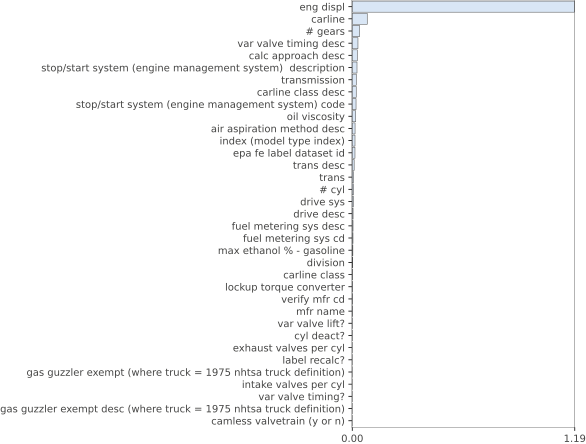

In [102]:
features=list(X2.columns)
I=importances(rf2,X2,y,features=features)
plot_importances(I)

In [103]:
# dropping non used features
sniff_modified(final_df)

,data type,percent missing,No. unique,unique values
lockup torque converter,int32,0.0,2,"[1, 2]"
drive desc,int32,0.0,5,"[1, 2, 3, 4, 5]"
gas guzzler exempt (where truck = 1975 nhtsa truck definition),int32,0.0,2,"[1, 2]"
gas guzzler exempt desc (where truck = 1975 nhtsa truck definition),int32,0.0,2,"[1, 2]"
carline class desc,int32,0.0,22,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
calc approach desc,int32,0.0,3,"[1, 2, 3]"
label recalc?,int32,0.0,3,"[1, 2, 3]"
drive sys,int32,0.0,5,"[1, 2, 3, 4, 5]"
cyl deact?,int32,0.0,2,"[1, 2]"
var valve timing desc,int32,0.0,82,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [104]:
final_df2=final_df.drop(['verify mfr cd',
'lockup torque converter',
'cyl deact?',
'var valve lift?',
'gas guzzler exempt desc (where truck = 1975 nhtsa truck definition)',
'var valve timing?',
'label recalc?',
'exhaust valves per cyl',
'intake valves per cyl',
'gas guzzler exempt (where truck = 1975 nhtsa truck definition)',
'camless valvetrain (y or n)'],axis=1)
sniff_modified(final_df)


,data type,percent missing,No. unique,unique values
lockup torque converter,int32,0.0,2,"[1, 2]"
drive desc,int32,0.0,5,"[1, 2, 3, 4, 5]"
gas guzzler exempt (where truck = 1975 nhtsa truck definition),int32,0.0,2,"[1, 2]"
gas guzzler exempt desc (where truck = 1975 nhtsa truck definition),int32,0.0,2,"[1, 2]"
carline class desc,int32,0.0,22,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
calc approach desc,int32,0.0,3,"[1, 2, 3]"
label recalc?,int32,0.0,3,"[1, 2, 3]"
drive sys,int32,0.0,5,"[1, 2, 3, 4, 5]"
cyl deact?,int32,0.0,2,"[1, 2]"
var valve timing desc,int32,0.0,82,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [106]:
# Running RF after dropping the columns above gives us a slightly improved OOB Score 
X3=final_df2
baseline_list2=[]
for i in range(10):
    rf3 = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
    rf3.fit(X3,y)
    oob_baseline3 = rf3.oob_score_
    baseline_list2.append(oob_baseline3) 

print("Avg OOB Score =", np.mean(baseline_list2))

Avg OOB Score = 0.9465713833474064


In [107]:
#Trying one hot encoding on feature 'air aspiration method desc'

In [108]:
final_df2['air aspiration method desc'].drop
oh_encoding=pd.get_dummies(final_df2['air aspiration method desc'])
final_df2=pd.concat([final_df2,oh_encoding],axis=1)

In [109]:
X4=final_df2

baseline_list3=[]
for i in range(10):
    rf4 = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
    rf4.fit(X4,y)
    oob_baseline4 = rf4.oob_score_
    baseline_list3.append(oob_baseline4) 

print("Avg OOB Score =", np.mean(baseline_list3))


Avg OOB Score = 0.9467096310163333


### Part 6 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using only the features that give the best results after the exploration done in Part 4 

In [110]:
# Here, we are only considering the features with 

final_df3=final_df2.drop(['carline class',
'division',
'max ethanol % - gasoline'],axis=1)
X5=final_df3
baseline_list_final=[]
for i in range(10):
    rf5 = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True)
    rf5.fit(X5,y)
    oob_baseline5 = rf5.oob_score_
    baseline_list_final.append(oob_baseline5) 

print("Avg OOB Score =", np.mean(baseline_list_final))


Avg OOB Score = 0.9488215320833542



### Part 7 - How did you do?

**Question** What is the percent difference between the oob score of your best model and the baseline calculated in **Part 4**?

In [112]:
diff = np.mean(baseline_list_final) - np.mean(baseline_list_1)
diff

0.0029212101824204195

**Enter your answer here:** The difference is negligible ,i.e., 0.0029 (approx.)

**Question** What changes did you make to the data set of **Part 4** to get to the final data set used in **Part 6** and how much did each change increase the oob score that you calculated in **Part 4**? 

** Please note that the change in oob score below is in comparing different OOB scores in Part 5 with respect to OOB of Part 4 **

**Enter your answer here:**

| Change made | Change in oob score | 
| :- | :-: |  
|  Dropped bottom 11 features as per feature importance  | +0.000671061446472998    | 
|  Did one hot encoding for one feature 'air aspiration method desc' feature  | +0.000809309115400003    | 